## EXPLORING GLOBAL WILDLIFE GIS DATABASE

In [2]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 26.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00a 0:00:01


In [4]:
#Preview of the dataset
import geopandas as gpd # version: 0.9.0

gdf_iucn = gpd.read_file('MAMMALS_TERRESTRIAL_ONLY.zip')
print('Number of records: ', len(gdf_iucn))
print('Number of attributes: ', len(gdf_iucn.keys()))
gdf_iucn.head(3)

Number of records:  12499
Number of attributes:  29


id_no              sci_name  presence  origin  seasonal  \
0     18  Abrocoma boliviensis         1       1         1   
1    137   Acerodon celebensis         1       1         1   
2    137   Acerodon celebensis         1       1         1   

                                 compiler  yrcompiled  \
0  IUCN SSC Small Mammal Specialist Group        2016   
1                                    IUCN        2022   
2                                    IUCN        2022   

                                            citation subspecies subpop  ...  \
0             IUCN SSC Small Mammal Specialist Group       None   None  ...   
1  IUCN (International Union for Conservation of ...       None   None  ...   
2  IUCN (International Union for Conservation of ...       None   None  ...   

       order_        family     genus category  marine terrestria freshwater  \
0    RODENTIA   ABROCOMIDAE  Abrocoma       CR   false       true      false   
1  CHIROPTERA  PTEROPODIDAE  Acerodon       VU   false       true      false   
2  CHIROPTERA  PTEROPODIDAE  Acerodon       VU   false       true      false   

  SHAPE_Leng SHAPE_Area                                           geometry  
0   0.305150   0.005520  POLYGON ((-64.46864 -17.88625, -64.45733 -17.8...  
1   1.669506   0.053674  POLYGON ((120.5074 -5.83896, 120.5113 -5.84116...  
2   0.497459   0.009368  POLYGON ((125.426 2.74894, 125.4247 2.74344, 1...  

[3 rows x 29 columns]

In [5]:
print(len(set(gdf_iucn.id_no)))
print(len(set(gdf_iucn.sci_name)))

5637
5637


In [6]:
#Taxonomical categories
from collections import Counter

for a in ['kingdom', 'phylum', 'class', 'order_', 'family', 'genus']:    
    print(a, Counter(gdf_iucn[[a, 'sci_name']].drop_duplicates()[a].to_list()).most_common(3), len(set(gdf_iucn[a])))

kingdom [('ANIMALIA', 5637)] 1
phylum [('CHORDATA', 5637)] 1
class [('MAMMALIA', 5637)] 1
order_ [('RODENTIA', 2276), ('CHIROPTERA', 1319), ('PRIMATES', 524)] 26
family [('MURIDAE', 764), ('CRICETIDAE', 659), ('VESPERTILIONIDAE', 462)] 137
genus [('Crocidura', 197), ('Myotis', 121), ('Rhinolophus', 92)] 1178


In [7]:
#The first five records for the genus search Canis — the closest relatives to dogs
gdf_iucn[gdf_iucn.genus=='Canis'].head(5)

id_no       sci_name  presence  origin  seasonal            compiler  \
625   3745  Canis latrans         1       1         1  Hody and Kays 2018   
626   3746    Canis lupus         1       1         1                IUCN   
627   3746    Canis lupus         5       1         1                IUCN   
628   3746    Canis lupus         5       1         1                IUCN   
629   3746    Canis lupus         1       1         1                IUCN   

     yrcompiled                                           citation subspecies  \
625        2018                                 Hody and Kays 2018       None   
626        2023  IUCN (International Union for Conservation of ...       None   
627        2023  IUCN (International Union for Conservation of ...       None   
628        2023  IUCN (International Union for Conservation of ...       None   
629        2023  IUCN (International Union for Conservation of ...       None   

    subpop  ...     order_   family  genus category  marine terrestria  \
625   None  ...  CARNIVORA  CANIDAE  Canis       LC   false       true   
626   None  ...  CARNIVORA  CANIDAE  Canis       LC   false       true   
627   None  ...  CARNIVORA  CANIDAE  Canis       LC   false       true   
628   None  ...  CARNIVORA  CANIDAE  Canis       LC   false       true   
629   None  ...  CARNIVORA  CANIDAE  Canis       LC   false       true   

    freshwater   SHAPE_Leng   SHAPE_Area  \
625      false  1528.415657  1713.673790   
626      false     6.555268     0.409227   
627      false    74.066636    23.008276   
628      false    26.097209     8.690085   
629      false     6.653216     0.412134   

                                              geometry  
625  POLYGON ((-94.47741 29.55673, -94.47741 29.556...  
626  POLYGON ((-133.86899 57.09461, -133.84253 57.0...  
627  POLYGON ((141.03064 41.48123, 141.03349 41.480...  
628  POLYGON ((141.94014 45.52314, 141.95334 45.513...  
629  POLYGON ((22.60921 58.60505, 22.63522 58.58464...  

[5 rows x 29 columns]

# How are habitat types characterized?

In [9]:
#Preview on the habitat-scoring subset of the dataset.
gdf_iucn[['presence', 'origin', 'seasonal', 'legend']].head(5)

presence  origin  seasonal             legend
0         1       1         1  Extant (resident)
1         1       1         1  Extant (resident)
2         1       1         1  Extant (resident)
3         1       1         1  Extant (resident)
4         1       1         1  Extant (resident)

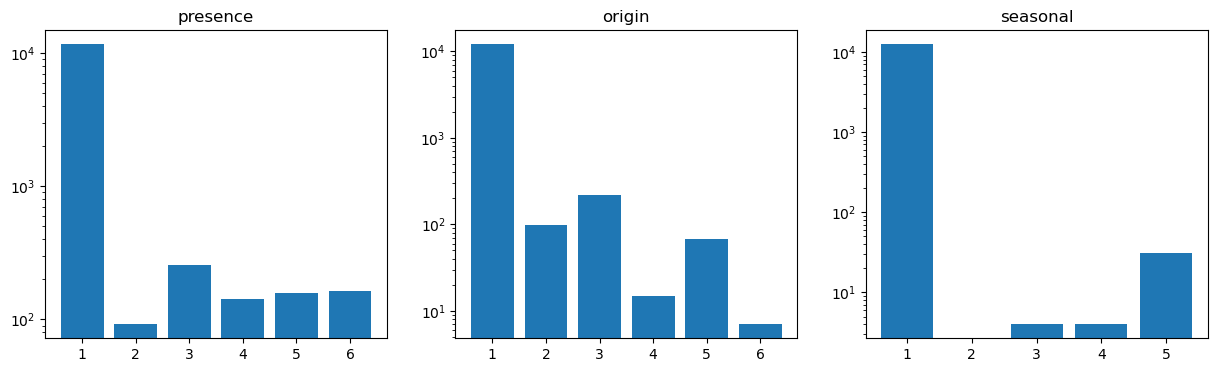

In [10]:
#Distributions of habitat attributes
import matplotlib.pyplot as plt
from collections import Counter

def get_distribution(x):
    return list(zip(*[(k, v) for k, v in Counter(x.to_list()).most_common()]))

f, ax = plt.subplots(1,3,figsize = (15,4))

for idx, feat in enumerate(['presence', 'origin', 'seasonal']):    
    values, frequencies = get_distribution(gdf_iucn[feat])
    ax[idx].bar(values, frequencies)
    ax[idx].set_yscale('log')
    ax[idx].set_title(feat)

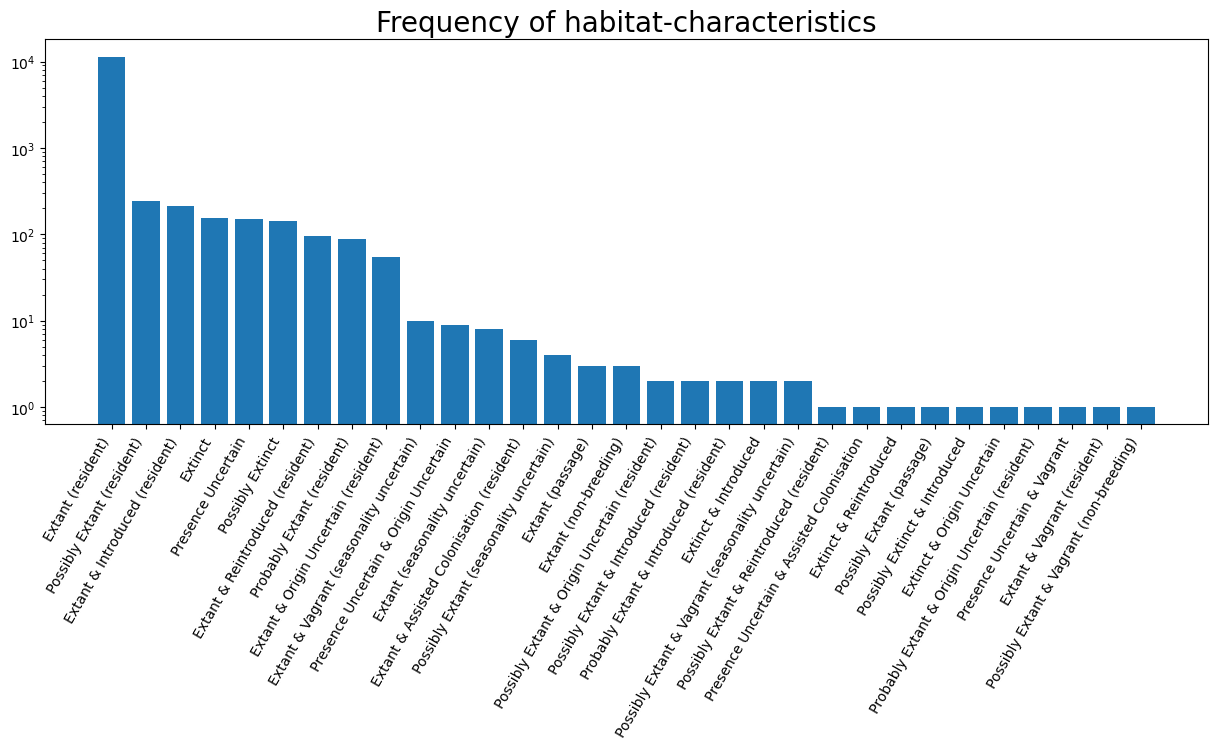

In [11]:
f, ax = plt.subplots(1,1,figsize = (15,5))

values, frequencies = get_distribution(gdf_iucn['legend'])
ax.bar(values, frequencies)
ax.set_title('Frequency of habitat-characteristics', fontsize = 20)
ax.set_yscale('log')
ax.set_xticks(range(len(values)))
ax.set_xticklabels(values, rotation = 60, ha = 'right')
plt.show()

# Meta information 

In [12]:
Counter(gdf_iucn.compiler).most_common(5)

[('IUCN', 10703),
 ('IUCN SSC Small Mammal Specialist Group', 978),
 ('Conor Mallory', 56),
 ('Stefan Michel', 48),
 ('IUCN SSC Pangolin Specialist Group', 39)]

In [13]:
#Top 5 data compiling entities
Counter(gdf_iucn.source).most_common(5)

[(None, 11844),
 ('Cuyler, C., Rowell, J., Adamczewski, J. et al. Muskox status, recent variation, and uncertain future. Ambio 49, 805–819 (2020). https://doi.org/10.1007/s13280-019-01205-x',
  56),
 ('Sargis et al. 2017', 14),
 ('Musser et al. 2010', 8),
 ('Monadjem et al. 2015', 7)]

In [14]:
#Top 5 data souces
Counter(gdf_iucn.citation).most_common(5)

[('IUCN (International Union for Conservation of Nature)', 10740),
 ('IUCN SSC Small Mammal Specialist Group', 978),
 ('African Lion Database. Unpublished Data. 2023', 92),
 ('International Union for the Conservation of Nature', 72),
 ('IUCN SSC Caprinae Specialist Group', 56)]

In [15]:
#top 5 most cited sources
min(gdf_iucn.yrcompiled), max(gdf_iucn.yrcompiled)

(2008, 2024)

<BarContainer object of 17 artists>

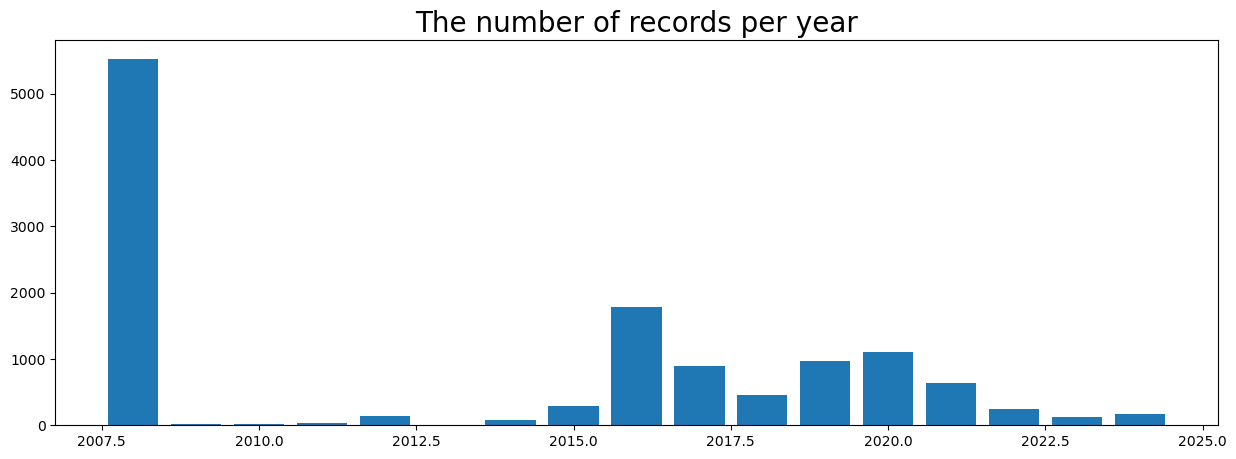

In [16]:
f, ax = plt.subplots(1,1,figsize = (15,5))

ax.set_title('The number of records per year', fontsize = 20)
values, frequencies = get_distribution(gdf_iucn['yrcompiled'])
ax.bar(values, frequencies)

## Endangerment information

In [17]:
category_d = {  'EX' : 'Extinct',
                'EW' : 'Extinct in The Wild',
                'RE' : 'Regionally Extinct',
                'CR' : 'Critically Endangered',
                'EN' : 'Endangered',
                'VU' : 'Vulnerable', 
                'DD' : 'Data Deficient',
                'LC' : 'Least Concern',
                'NT' : 'Not Threatened'
     }

gdf_iucn['category'] = gdf_iucn['category'].map(category_d)

Counter(gdf_iucn[['sci_name', 'category']].drop_duplicates().category).most_common()

[('Least Concern', 3215),
 ('Data Deficient', 795),
 ('Vulnerable', 522),
 ('Endangered', 509),
 ('Not Threatened', 354),
 ('Critically Endangered', 228),
 ('Extinct', 14)]

In [18]:
sorted(set(gdf_iucn[gdf_iucn.category.isin(['Extinct', 'Extinct in The Wild'])].sci_name.to_list()))

['Dusicyon australis',
 'Dusicyon avus',
 'Juscelinomys candango',
 'Leporillus apicalis',
 'Melomys rubicola',
 'Nesoryzomys darwini',
 'Nyctophilus howensis',
 'Palaeopropithecus ingens',
 'Pennatomys nivalis',
 'Pipistrellus murrayi',
 'Pteropus subniger',
 'Pteropus tokudae',
 'Sus bucculentus',
 'Xenothrix mcgregori']

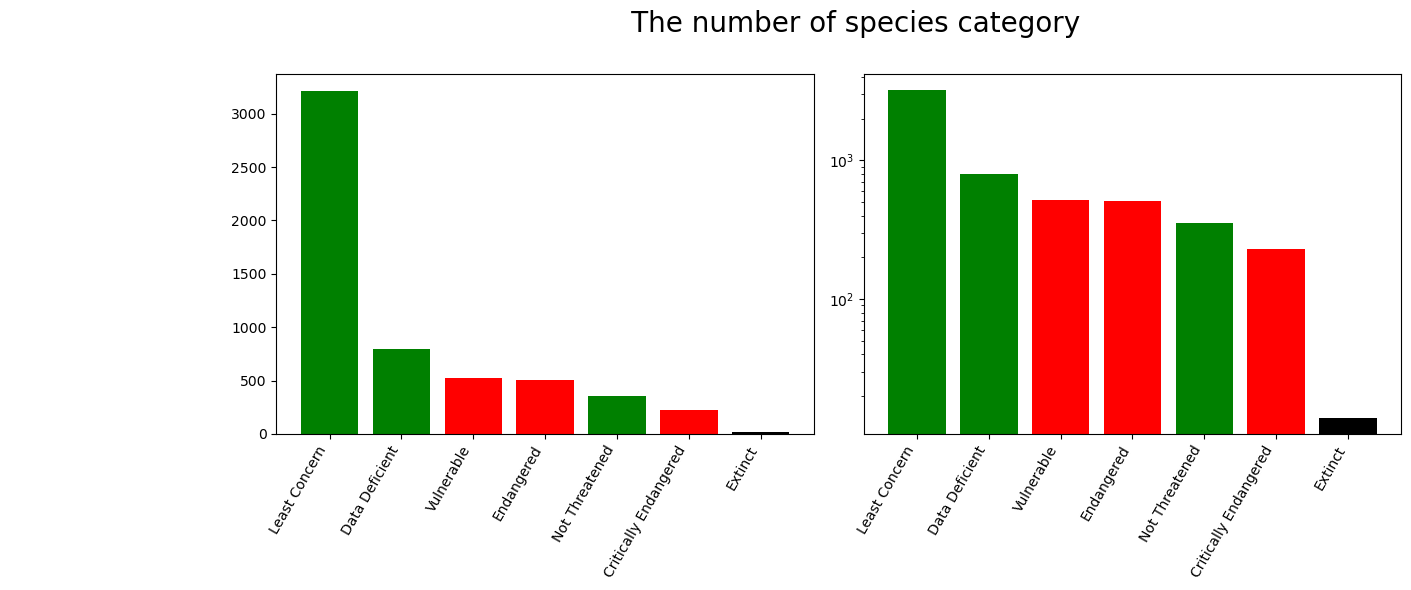

In [19]:
#Visualization
def get_color(x):
    if x in ['Critically Endangered', 'Endangered', 'Vulnerable']:
        return 'red'
    elif x in ['Extinct in The Wild', 'Regionally Extinct', 'Extinct']:
        return 'k'
    else:
        return 'green'

f, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].set_title(70 * ' ' + 'The number of species category', fontsize = 20, pad = 30)
values, frequencies = get_distribution(gdf_iucn[['sci_name', 'category']].drop_duplicates().category)
colors = [get_color(v) for v in values]

for idx in range(2):
    ax[idx].bar(values, frequencies, color = colors)
    ax[idx].set_xticks(range(len(values)))
    ax[idx].set_xticklabels(values, rotation = 60, ha = 'right')
ax[1].set_yscale('log')

plt.tight_layout()

## Geospatial Exploration 

In [20]:
#Habitat size distribution
# lets sum up the area of each patch a species may have
gdf_iucn.groupby(by = 'sci_name').sum().sort_values(by = 'SHAPE_Area').head(10)


TypeError: agg function failed [how->sum,dtype->geometry]

In [21]:
# Exclude the 'geometry' column
gdf_iucn_no_geom = gdf_iucn.drop(columns='geometry')

# Group by 'sci_name' and sum the remaining columns
summed_gdf = gdf_iucn_no_geom.groupby(by='sci_name').sum()

# Sort the values by 'SHAPE_Area' and get the top 10
top_10_summed_gdf = summed_gdf.sort_values(by='SHAPE_Area').head(10)

# If you need the geometry column for other purposes, you can merge it back
top_10_with_geom = gdf_iucn[['sci_name', 'geometry']].drop_duplicates().merge(top_10_summed_gdf, on='sci_name')

# Display the result
print(top_10_with_geom)

                   sci_name  \
0          Melomys rubicola   
1          Microtus breweri   
2          Hypsugo lophurus   
3          Cavia intermedia   
4     Nyctophilus nebulosus   
5  Eudiscoderma thongareeae   
6        Rhinolophus kahuzi   
7          Murina balaensis   
8       Fukomys livingstoni   
9         Myotis nimbaensis   

                                            geometry      id_no  presence  \
0  POLYGON ((143.86869 -9.1327, 143.86869 -9.1327...      13132         5   
1  POLYGON ((-70.29593 41.3388, -70.29288 41.3383...      13417         1   
2  POLYGON ((98.6349 10.22824, 98.6325 10.22754, ...      17347         1   
3  POLYGON ((-48.43714 -27.85, -48.43711 -27.8491...     136520         1   
4  POLYGON ((166.51173 -22.17346, 166.5108 -22.17...     136807         1   
5  POLYGON ((101.8322 5.8012, 101.83194 5.80028, ...   80263386         1   
6  POLYGON ((28.68076 -2.25304, 28.67638 -2.25549...   82347204         1   
7  POLYGON ((101.80741 5.81352, 101.80683 

In [22]:
gdf_iucn.groupby(by = 'sci_name').sum().sort_values(by = 'SHAPE_Area').head(10).index.to_list()

TypeError: agg function failed [how->sum,dtype->geometry]

In [23]:
# Select only the numeric columns for the groupby and sum operations
numeric_columns = gdf_iucn.select_dtypes(include=[float, int]).columns

# Perform the groupby and sum operations
summed_gdf = gdf_iucn.groupby(by='sci_name')[numeric_columns].sum()

# Sort the values by 'SHAPE_Area' and get the top 10
top_10_summed_gdf = summed_gdf.sort_values(by='SHAPE_Area').head(10)

# If you need the geometry column for other purposes, you can merge it back
top_10_with_geom = gdf_iucn[['sci_name', 'geometry']].drop_duplicates().merge(top_10_summed_gdf, on='sci_name')

# Display the result
print(top_10_with_geom)


                   sci_name  \
0          Melomys rubicola   
1          Microtus breweri   
2          Hypsugo lophurus   
3          Cavia intermedia   
4     Nyctophilus nebulosus   
5  Eudiscoderma thongareeae   
6        Rhinolophus kahuzi   
7          Murina balaensis   
8       Fukomys livingstoni   
9         Myotis nimbaensis   

                                            geometry      id_no  presence  \
0  POLYGON ((143.86869 -9.1327, 143.86869 -9.1327...      13132         5   
1  POLYGON ((-70.29593 41.3388, -70.29288 41.3383...      13417         1   
2  POLYGON ((98.6349 10.22824, 98.6325 10.22754, ...      17347         1   
3  POLYGON ((-48.43714 -27.85, -48.43711 -27.8491...     136520         1   
4  POLYGON ((166.51173 -22.17346, 166.5108 -22.17...     136807         1   
5  POLYGON ((101.8322 5.8012, 101.83194 5.80028, ...   80263386         1   
6  POLYGON ((28.68076 -2.25304, 28.67638 -2.25549...   82347204         1   
7  POLYGON ((101.80741 5.81352, 101.80683 

In [24]:
gdf_iucn.groupby(by = 'sci_name').sum().sort_values(by = 'SHAPE_Area', ascending = False).head(10).index.to_list()

TypeError: agg function failed [how->sum,dtype->geometry]

In [25]:
# Exclude the 'geometry' column and any other non-numeric columns
numeric_columns = gdf_iucn.select_dtypes(include=[float, int]).columns

# Perform the groupby and sum operations on numeric columns
summed_gdf = gdf_iucn.groupby(by='sci_name')[numeric_columns].sum()

# Sort the values by 'SHAPE_Area' and get the top 10
top_10_summed_gdf = summed_gdf.sort_values(by='SHAPE_Area', ascending=False).head(10)

# If you need the 'sci_name' index as a list
top_10_sci_names = top_10_summed_gdf.index.to_list()

# Display the result
print(top_10_summed_gdf)
print(top_10_sci_names)


                        id_no  presence  origin  seasonal  yrcompiled  \
sci_name                                                                
Mus musculus            27944         2       8         2        4028   
Vulpes vulpes          368992        16      29        16       32256   
Canis lupus             67428        34      19        18       36414   
Mustela erminea        890220        30      32        30       60480   
Mustela nivalis    1123318544        16      42        16       32256   
Ursus arctos          1834272        68      52        52       88663   
Gulo gulo               86049         9       9         9       18144   
Sciurus vulgaris   1330385184         6      11         6       12138   
Alces alces          56003281         1       1         1        2016   
Rangifer tarandus      475872        16      24        16       32256   

                   generalisd   SHAPE_Leng   SHAPE_Area  
sci_name                                                 
Mus mus

                        id_no  presence  origin  seasonal  yrcompiled  \
sci_name                                                                
Mus musculus            27944         2       8         2        4028   
Vulpes vulpes          368992        16      29        16       32256   
Canis lupus             67428        34      19        18       36414   
Mustela erminea        890220        30      32        30       60480   
Mustela nivalis    1123318544        16      42        16       32256   
Ursus arctos          1834272        68      52        52       88663   
Gulo gulo               86049         9       9         9       18144   
Sciurus vulgaris   1330385184         6      11         6       12138   
Alces alces          56003281         1       1         1        2016   
Rangifer tarandus      475872        16      24        16       32256   

                   generalisd   SHAPE_Leng   SHAPE_Area  
sci_name                                                 
Mus mus

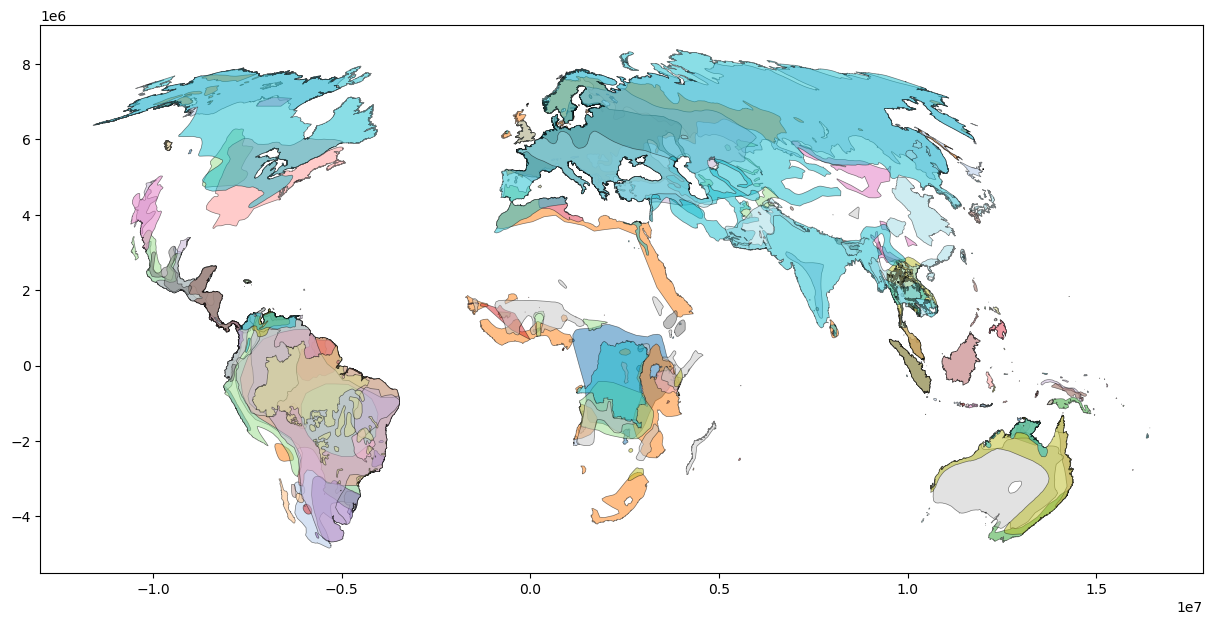

In [26]:
#Visualizing the habitat patches of 200 randomly selected species, each patch colored randomly.
import matplotlib.pyplot as plt

# Transform the coordinate reference system
gdf_iucn_t = gdf_iucn.copy()
gdf_iucn_t = gdf_iucn_t.to_crs('+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')

# Exclude the 'geometry' column and any other non-numeric columns
numeric_columns = gdf_iucn_t.select_dtypes(include=[float, int]).columns

# Perform the groupby and sum operations on numeric columns
summed_gdf_t = gdf_iucn_t.groupby(by='sci_name')[numeric_columns].sum()

# Sort the values by 'SHAPE_Area' and get the top 10
top_10_summed_gdf_t = summed_gdf_t.sort_values(by='SHAPE_Area', ascending=False).head(10)

# If you need the 'sci_name' index as a list
top_10_sci_names_t = top_10_summed_gdf_t.index.to_list()

# Display the result
print(top_10_summed_gdf_t)
print(top_10_sci_names_t)

# Plot a sample of the transformed GeoDataFrame
f, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_iucn_t.sample(200).plot(ax=ax, edgecolor='k', linewidth=0.5, alpha=0.5, cmap='tab20')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.3 MB/s eta 0:00:00


CPLE_NotSupportedError: Cannot find coordinate operations from 'EPSG:3857' to 'PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ID["EPSG",6326]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["unnamed",METHOD["Mollweide"],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["northing",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]'

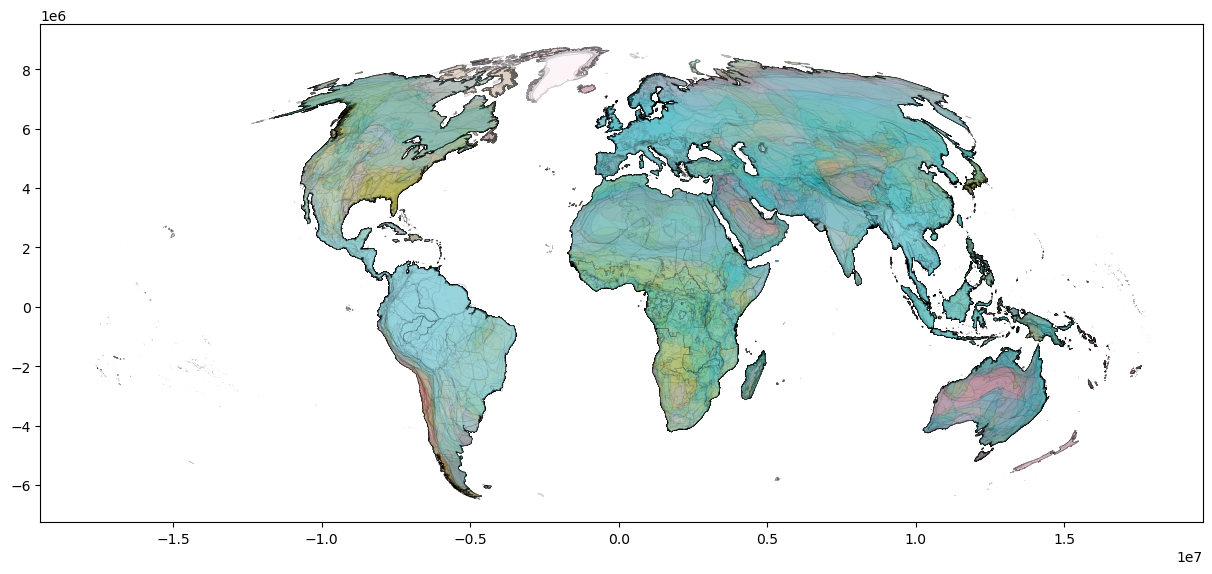

In [28]:
#The global map of all mammalian habitats, each patch colored at random.
!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt

# Transform the coordinate reference system
gdf_iucn_t = gdf_iucn.copy()
gdf_iucn_t = gdf_iucn_t.to_crs('+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')

# Plot the transformed GeoDataFrame with contextily basemap
f, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_iucn_t.plot(ax=ax, edgecolor='k', linewidth=0.5, alpha=0.15, cmap='tab20')
ctx.add_basemap(ax, alpha=0.8, crs=gdf_iucn_t.crs.to_string(), source=ctx.providers.Esri.WorldPhysical)
ax.axis('off')
ax.set_ylim([-9.5*10**6, 9.5*10**6])

plt.show()


CPLE_NotSupportedError: Cannot find coordinate operations from 'EPSG:3857' to 'PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ID["EPSG",6326]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["unnamed",METHOD["Mollweide"],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["northing",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]'

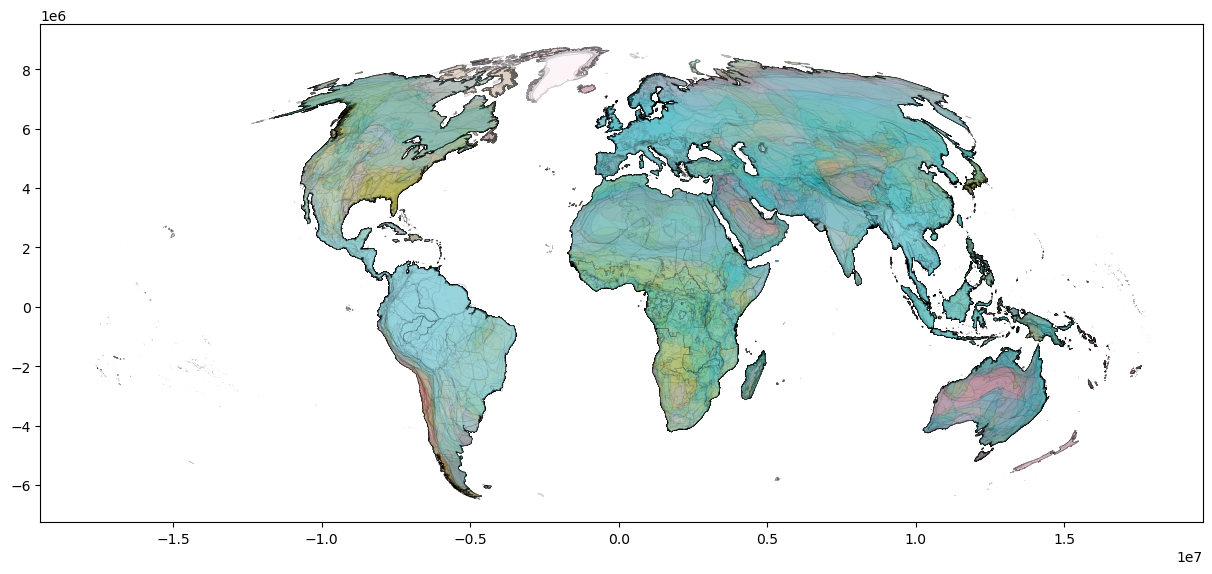

In [29]:
#The global map of all mammalian habitats, each patch colored at random.
# Transform the coordinate reference system
gdf_iucn_t = gdf_iucn.copy()
gdf_iucn_t = gdf_iucn_t.to_crs('+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')

# Plot the transformed GeoDataFrame with contextily basemap
f, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_iucn_t.plot(ax=ax, edgecolor='k', linewidth=0.5, alpha=0.15, cmap='tab20')
ctx.add_basemap(ax, alpha=0.8, crs=gdf_iucn_t.crs.to_string(), source=ctx.providers.Esri.WorldGrayCanvas)
ax.axis('off')
ax.set_ylim([-9.5*10**6, 9.5*10**6])

# Save the plot
# plt.savefig('worldmap_habitats_WorldGrayCanvas.png', dpi=600, bbox_inches='tight')

plt.show()

#Visualize the habitat polygons locally

In [30]:
# Filter the GeoDataFrame to include only rows where the genus contains 'Giraffa'
giraffa_data = gdf_iucn_t[gdf_iucn_t['genus'].str.contains('Giraffa')]

# Display the first 5 rows of the filtered GeoDataFrame
giraffa_data.head(5)

id_no                sci_name  presence  origin  seasonal compiler  \
2299   9194  Giraffa camelopardalis         1       1         1     IUCN   
2300   9194  Giraffa camelopardalis         1       1         1     IUCN   
2301   9194  Giraffa camelopardalis         1       1         1     IUCN   
2302   9194  Giraffa camelopardalis         1       1         1     IUCN   
2303   9194  Giraffa camelopardalis         1       1         1     IUCN   

      yrcompiled                                           citation  \
2299        2018  IUCN (International Union for Conservation of ...   
2300        2018  IUCN (International Union for Conservation of ...   
2301        2018  IUCN (International Union for Conservation of ...   
2302        2018  IUCN (International Union for Conservation of ...   
2303        2018  IUCN (International Union for Conservation of ...   

          subspecies subpop  ...        order_      family    genus  \
2299         giraffa   None  ...  ARTIODACTYLA  GIRAFFIDAE  Giraffa   
2300    thornicrofti   None  ...  ARTIODACTYLA  GIRAFFIDAE  Giraffa   
2301     rothschildi   None  ...  ARTIODACTYLA  GIRAFFIDAE  Giraffa   
2302  camelopardalis   None  ...  ARTIODACTYLA  GIRAFFIDAE  Giraffa   
2303         peralta   None  ...  ARTIODACTYLA  GIRAFFIDAE  Giraffa   

        category  marine terrestria freshwater  SHAPE_Leng SHAPE_Area  \
2299  Vulnerable   false       true      false  112.308618  39.482277   
2300  Vulnerable   false       true      false    7.456506   1.510481   
2301  Vulnerable   false       true      false   11.113271   1.462773   
2302  Vulnerable   false       true      false   27.564713   8.897220   
2303  Vulnerable   false       true      false    7.117762   3.148293   

                                               geometry  
2299  MULTIPOLYGON (((3067347.598 -3194061.03, 30675...  
2300  POLYGON ((3019084.424 -1643618.499, 3021328.83...  
2301  MULTIPOLYGON (((3738260.692 -185888.912, 37313...  
2302  MULTIPOLYGON (((3012285.467 614252.43, 3022811...  
2303  POLYGON ((346317.811 1524546.171, 343629.914 1...  

[5 rows x 29 columns]

CPLE_NotSupportedError: Cannot find coordinate operations from 'EPSG:3857' to 'PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ID["EPSG",6326]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["unnamed",METHOD["Mollweide"],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["northing",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]'

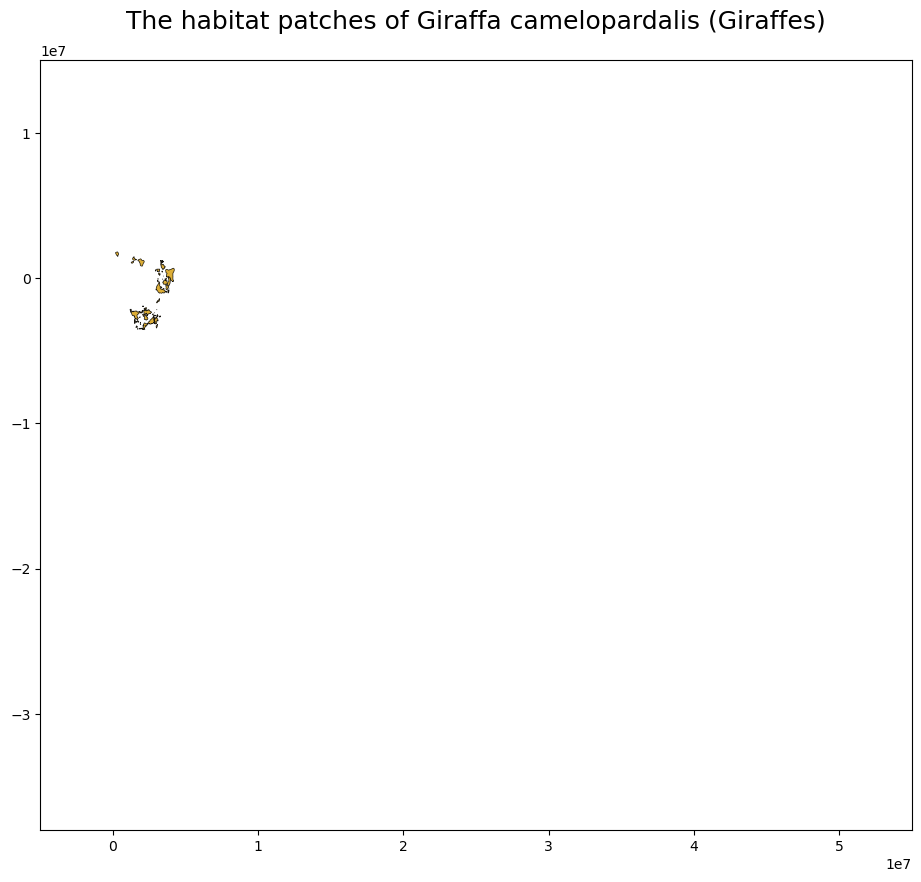

In [31]:
# Create a figure and axis
f, ax = plt.subplots(1, 1, figsize=(15, 10))

# Filter the GeoDataFrame to include only rows where the scientific name is 'Giraffa camelopardalis'
giraffa_gdf = gdf_iucn_t[gdf_iucn_t['sci_name'] == 'Giraffa camelopardalis']

# Plot the filtered data
giraffa_gdf.plot(ax=ax, edgecolor='k', linewidth=0.5, alpha=0.9, color='#DAA520')

# Set the x and y axis limits
ax.set_xlim([-5*10**6, 55*10**6])
ax.set_ylim([-38*10**6, 15*10**6])

# Set the title of the plot
ax.set_title('The habitat patches of Giraffa camelopardalis (Giraffes)', fontsize=18, y=1.03)

# Add a basemap
ctx.add_basemap(ax, alpha=0.8, crs=gdf_iucn_t.crs.to_string(), source=ctx.providers.Esri.WorldPhysical)

# Remove the axis
ax.axis('off')

# Save the plot to a file
plt.savefig('1_giraffe.png', dpi=200, bbox_inches='tight')

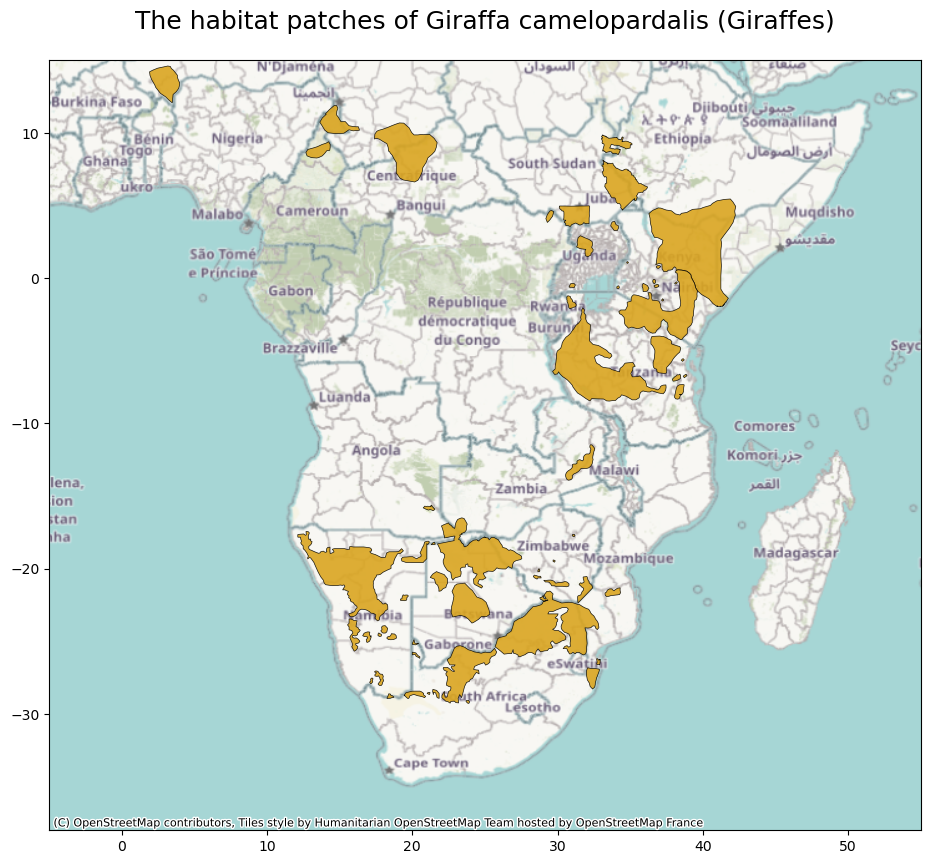

In [32]:
f, ax = plt.subplots(1,1,figsize=(15,10))
gdf_iucn[gdf_iucn.sci_name=='Giraffa camelopardalis'].plot(ax=ax, edgecolor = 'k', linewidth = 0.5, alpha = 0.9, color = '#DAA520')

ax.set_xlim([-5, 55])
ax.set_ylim([-38, 15])
ax.set_title('The habitat patches of Giraffa camelopardalis (Giraffes)', fontsize = 18, y = 1.03)

ctx.add_basemap(ax, alpha = 0.8, crs = gdf_iucn.crs, url = ctx.providers.Esri.WorldPhysical)
plt.savefig('1_giraffe.png', dpi = 200)

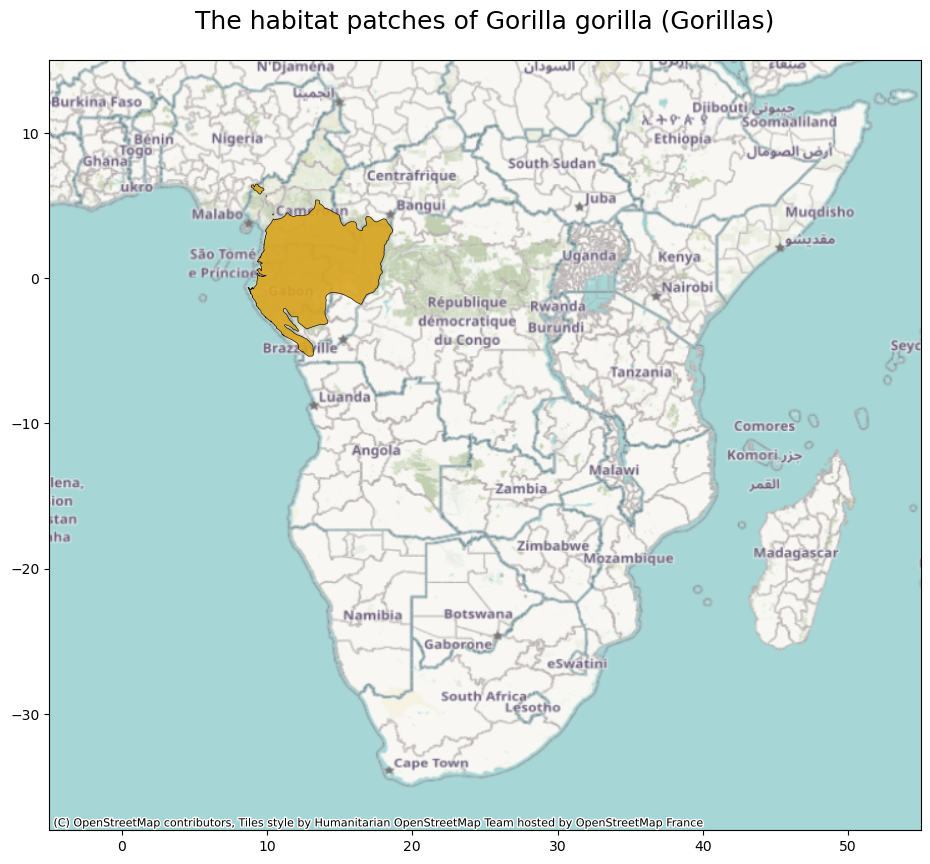

In [34]:
f, ax = plt.subplots(1,1,figsize=(15,10))
gdf_iucn[gdf_iucn.sci_name=='Gorilla gorilla'].plot(ax=ax, edgecolor = 'k', linewidth = 0.5, alpha = 0.9, color = '#DAA520')

ax.set_xlim([-5, 55])
ax.set_ylim([-38, 15])
ax.set_title('The habitat patches of Gorilla gorilla (Gorillas)', fontsize = 18, y = 1.03)

ctx.add_basemap(ax, alpha = 0.8, crs = gdf_iucn.crs, url = ctx.providers.Esri.WorldPhysical)
plt.savefig('1_gorilla.png', dpi = 200)

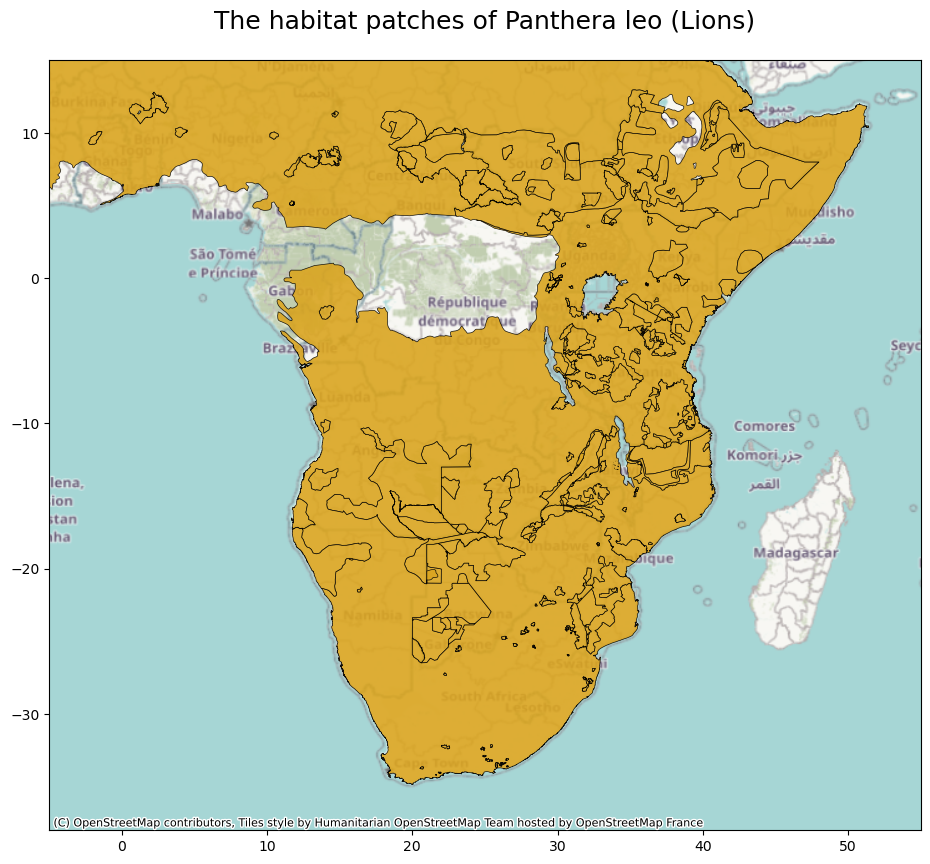

In [35]:
#lions
f, ax = plt.subplots(1,1,figsize=(15,10))
gdf_iucn[gdf_iucn.sci_name=='Panthera leo'].plot(ax=ax, edgecolor = 'k', linewidth = 0.5, alpha = 0.9, color = '#DAA520')

ax.set_xlim([-5, 55])
ax.set_ylim([-38, 15])
ax.set_title('The habitat patches of Panthera leo (Lions)', fontsize = 18, y = 1.03)

ctx.add_basemap(ax, alpha = 0.8, crs = gdf_iucn.crs, url = ctx.providers.Esri.WorldPhysical)
plt.savefig('1_Lion.png', dpi = 200)

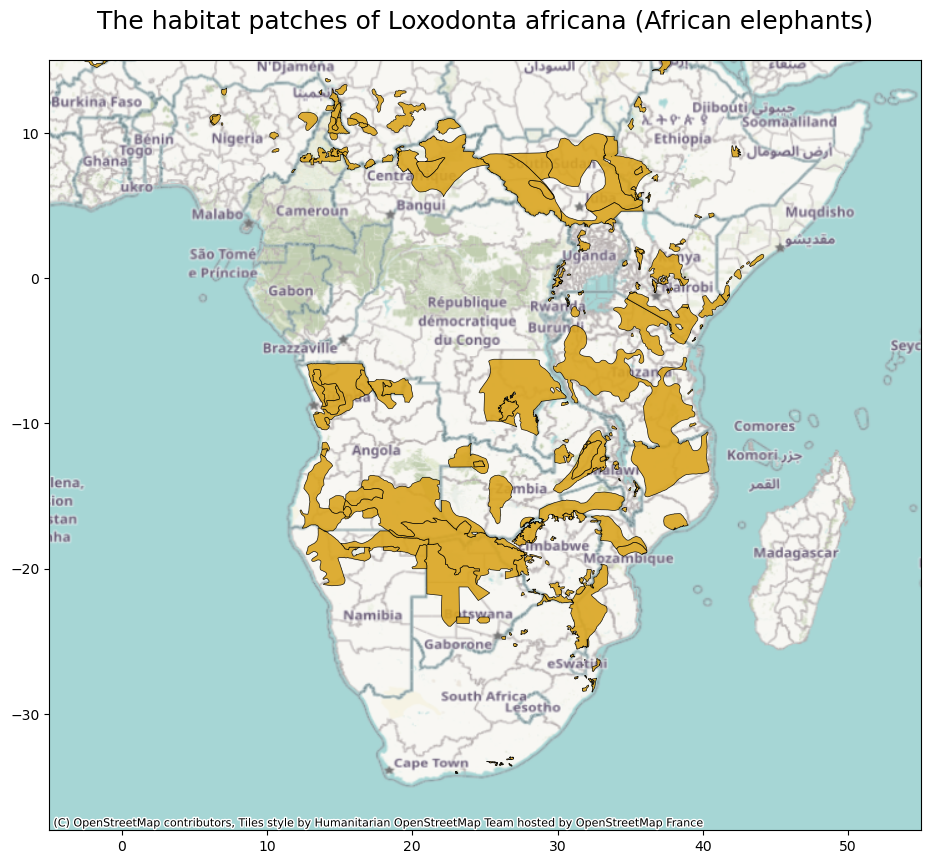

In [36]:
#African Elephant
f, ax = plt.subplots(1,1,figsize=(15,10))
gdf_iucn[gdf_iucn.sci_name=='Loxodonta africana'].plot(ax=ax, edgecolor = 'k', linewidth = 0.5, alpha = 0.9, color = '#DAA520')

ax.set_xlim([-5, 55])
ax.set_ylim([-38, 15])
ax.set_title('The habitat patches of Loxodonta africana (African elephants)', fontsize = 18, y = 1.03)

ctx.add_basemap(ax, alpha = 0.8, crs = gdf_iucn.crs, url = ctx.providers.Esri.WorldPhysical)
plt.savefig('1_elephant.png', dpi = 200)

# Mapping into countries

258


<Axes: >

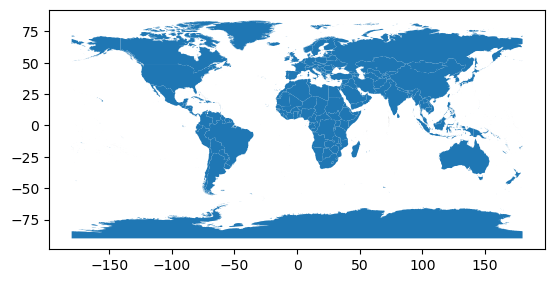

In [38]:
world = gpd.read_file('ne_10m_admin_0_countries.zip')
print(len(set(world.ADMIN)))
world.plot()

In [39]:
#Let’s group endangerement categories together:
def is_endangered(x):
    if x in ['Critically Endangered', 'Endangered', 'Vulnerable']:
        return True
    else:
        return False


gdf_iucn['endangered_species'] = gdf_iucn.category.apply(is_endangered)
print(Counter(gdf_iucn['endangered_species']))


Counter({False: 9788, True: 2711})


In [40]:
#Now build country-level dictionaries measuring the number of species and endangered species in each country:
number_of_all_species = gpd.overlay(world, gdf_iucn).groupby(by = 'ADMIN').count().to_dict()['geometry']

number_of_end_species = gpd.overlay(world, gdf_iucn[gdf_iucn.endangered_species==True]).groupby(by = 'ADMIN').count().to_dict()['geometry']

world['number_of_all_species'] = world.ADMIN.map(number_of_all_species)
world['number_of_end_species'] = world.ADMIN.map(number_of_end_species)
world['number_of_all_species'] = world['number_of_all_species'].fillna(0)
world['number_of_end_species'] = world['number_of_end_species'].fillna(0)
world['ratio_of_end_species']  = world['number_of_end_species'] / world['number_of_all_species']

/var/folders/qb/6549l579391985b3r2b4__l80000gn/T/ipykernel_25755/2837666934.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 762 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  number_of_all_species = gpd.overlay(world, gdf_iucn).groupby(by = 'ADMIN').count().to_dict()['geometry']
/var/folders/qb/6549l579391985b3r2b4__l80000gn/T/ipykernel_25755/2837666934.py:4: UserWarning: `keep_geom_type=True` in overlay resulted in 762 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  number_of_end_species = gpd.overlay(world, gdf_iucn[gdf_iucn.endangered_species==True]).groupby(by = 'ADMIN').count().to_dict()['geometry']


NameError: name 'make_axes_locatable' is not defined

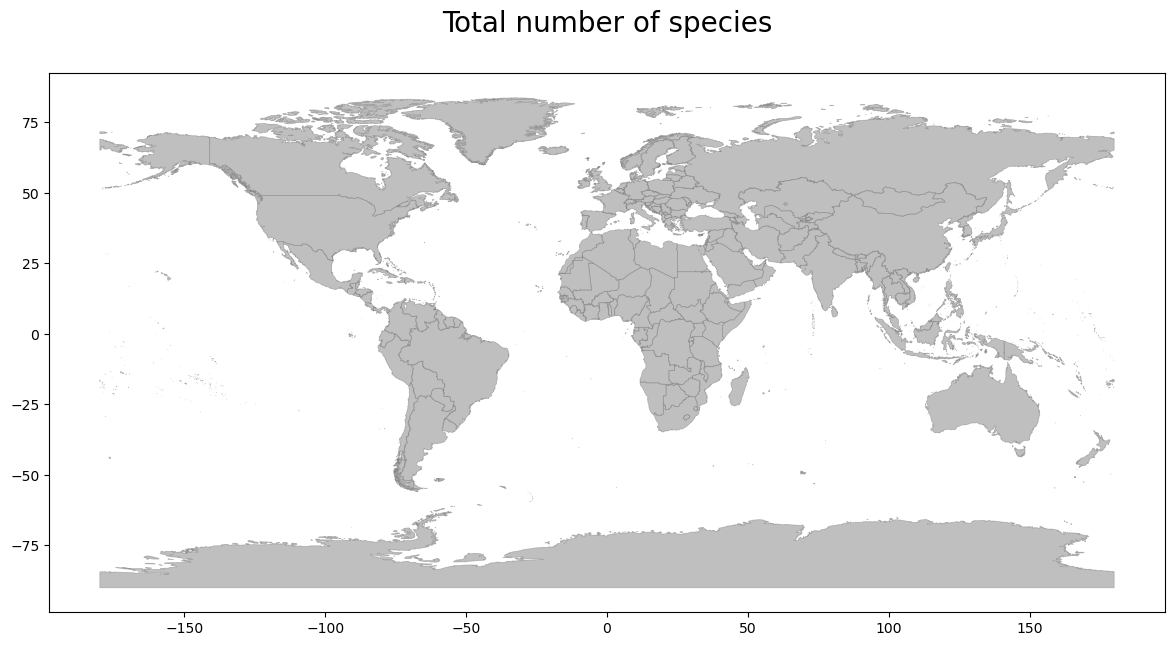

In [43]:
#Finally, use these updated to visualize the global distributions on the level of countries:from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

f, ax = plt.subplots(1,1,figsize=(15,7))

ax.set_title('Total number of species', fontsize = 20, pad = 30)
world.plot(ax=ax, color = 'grey', alpha = 0.5, linewidth = 0.5, edgecolor = 'grey')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.01)
world[world.number_of_all_species>0].plot(column = 'number_of_all_species',ax=ax,legend_kwds={'label': "Total number of species"}, edgecolor ='k',  linewidth = 1.5, cax=cax, cmap = 'Green', legend=True,  norm=LogNorm(vmin=1, vmax=world.number_of_all_species.max()))


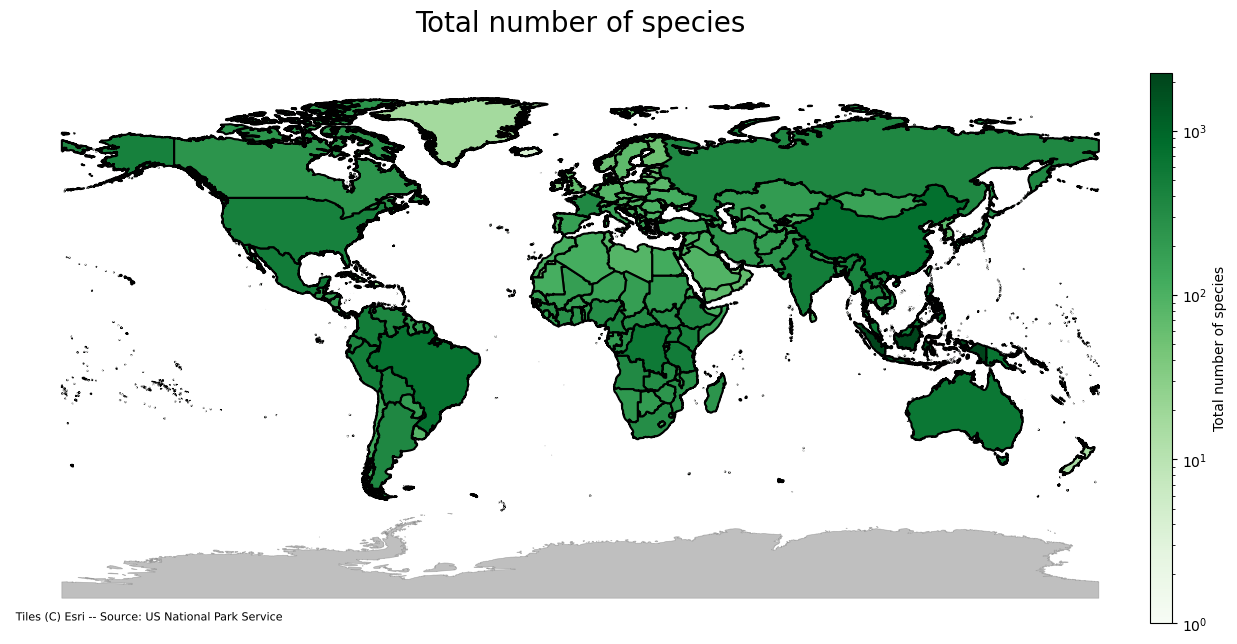

In [44]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

# Sample data (replace this with your actual data)
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a figure and axis
f, ax = plt.subplots(1, 1, figsize=(15, 10))

# Set the title of the plot
ax.set_title('Total number of species', fontsize=20, pad=30)

# Plot the world map with grey color
world.plot(ax=ax, color='grey', alpha=0.5, linewidth=0.5, edgecolor='grey')

# Create a color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.01)

# Plot the data with number_of_all_species column and add the color bar
world[world.number_of_all_species > 0].plot(column='number_of_all_species', ax=ax, 
                                            legend_kwds={'label': "Total number of species"}, 
                                            edgecolor='k', linewidth=1.5, cax=cax, 
                                            cmap='Greens', legend=True, 
                                            norm=LogNorm(vmin=1, vmax=world.number_of_all_species.max()))

# Add basemap
ctx.add_basemap(ax, crs=world.crs.to_string(), source=ctx.providers.Esri.WorldPhysical)

# Remove the axis
ax.axis('off')

# Save the plot to a file (optional)
# plt.savefig('total_species.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()


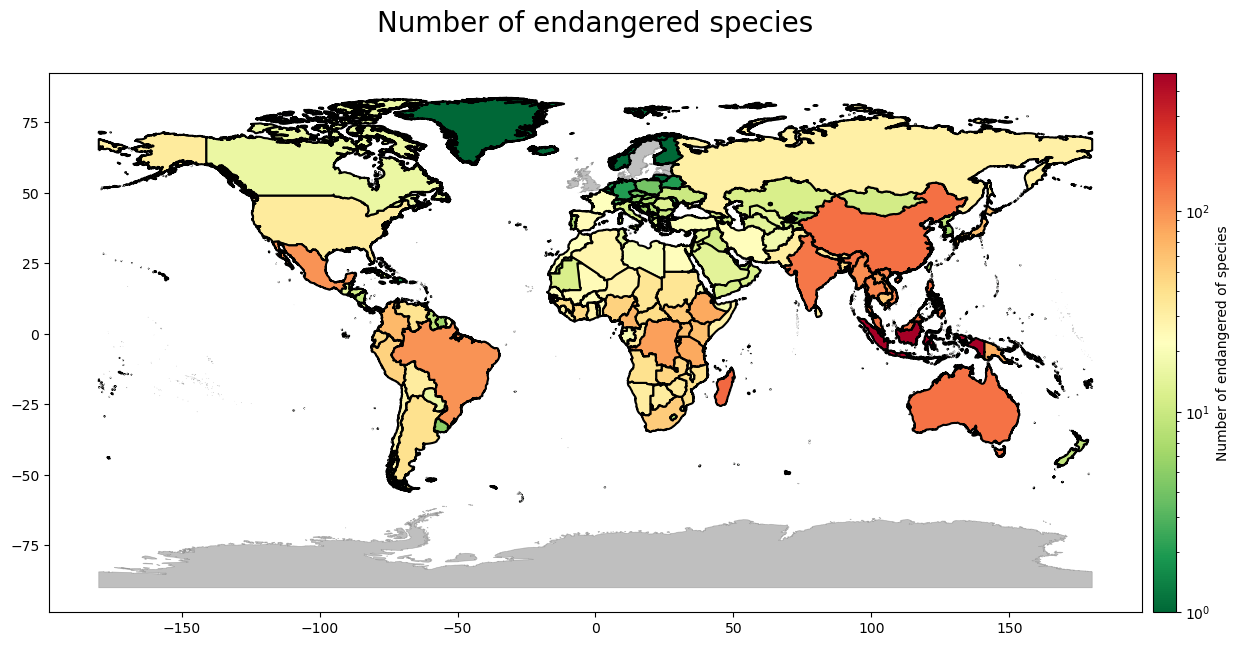

In [45]:
f, ax = plt.subplots(1,1,figsize=(15,7))

ax.set_title('Number of endangered species', fontsize = 20, pad = 30)
world.plot(ax=ax, color = 'grey', alpha = 0.5, linewidth = 0.5, edgecolor = 'grey')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.01)
world[world.number_of_end_species>0].plot(column = 'number_of_end_species',ax=ax, legend_kwds={'label': "Number of endangered of species"}, edgecolor ='k', linewidth = 1.5, cax=cax, cmap = 'RdYlGn_r',  legend=True,  norm=LogNorm(vmin=1, vmax=world.number_of_end_species.max()))

plt.savefig('2_map.png', dpi = 200)

<Axes: title={'center': 'Ratio of endangered species'}>

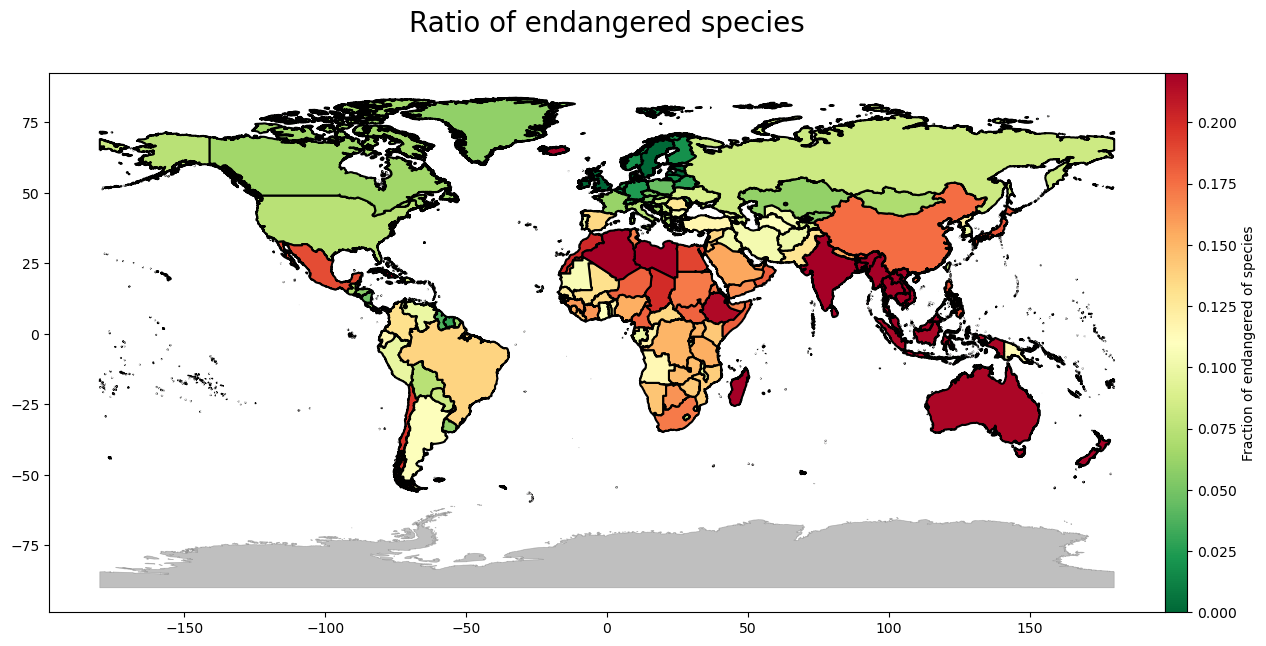

In [46]:
f, ax = plt.subplots(1,1,figsize=(15,7))

ax.set_title('Ratio of endangered species', fontsize = 20, pad = 30)
world.plot(ax=ax, color = 'grey', alpha = 0.5, linewidth = 0.5, edgecolor = 'grey')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.01)
world.plot(column = 'ratio_of_end_species',ax=ax,  legend_kwds={'label': "Fraction of endangered of species"}, edgecolor ='k', linewidth = 1.5, cax=cax, cmap = 'RdYlGn_r', legend=True, vmin = 0, vmax = 0.22)
